Physical Interpretation of Beta Distribution Parameters
for Precipitation Pattern Analysis
  > Extracting precipitation events...
    - Total Events Extracted: 645
  > Fitting Beta Distribution Parameters...

Analysis Period: 2001-2024
Total Events: 645
Mean Intensity: 2.17 mm/hr
Mean Duration: 19.5 hours
Mean Total Precipitation: 45.3 mm

TOPIC 1: Correlation Analysis
Beta Parameters vs. Physical Quantities


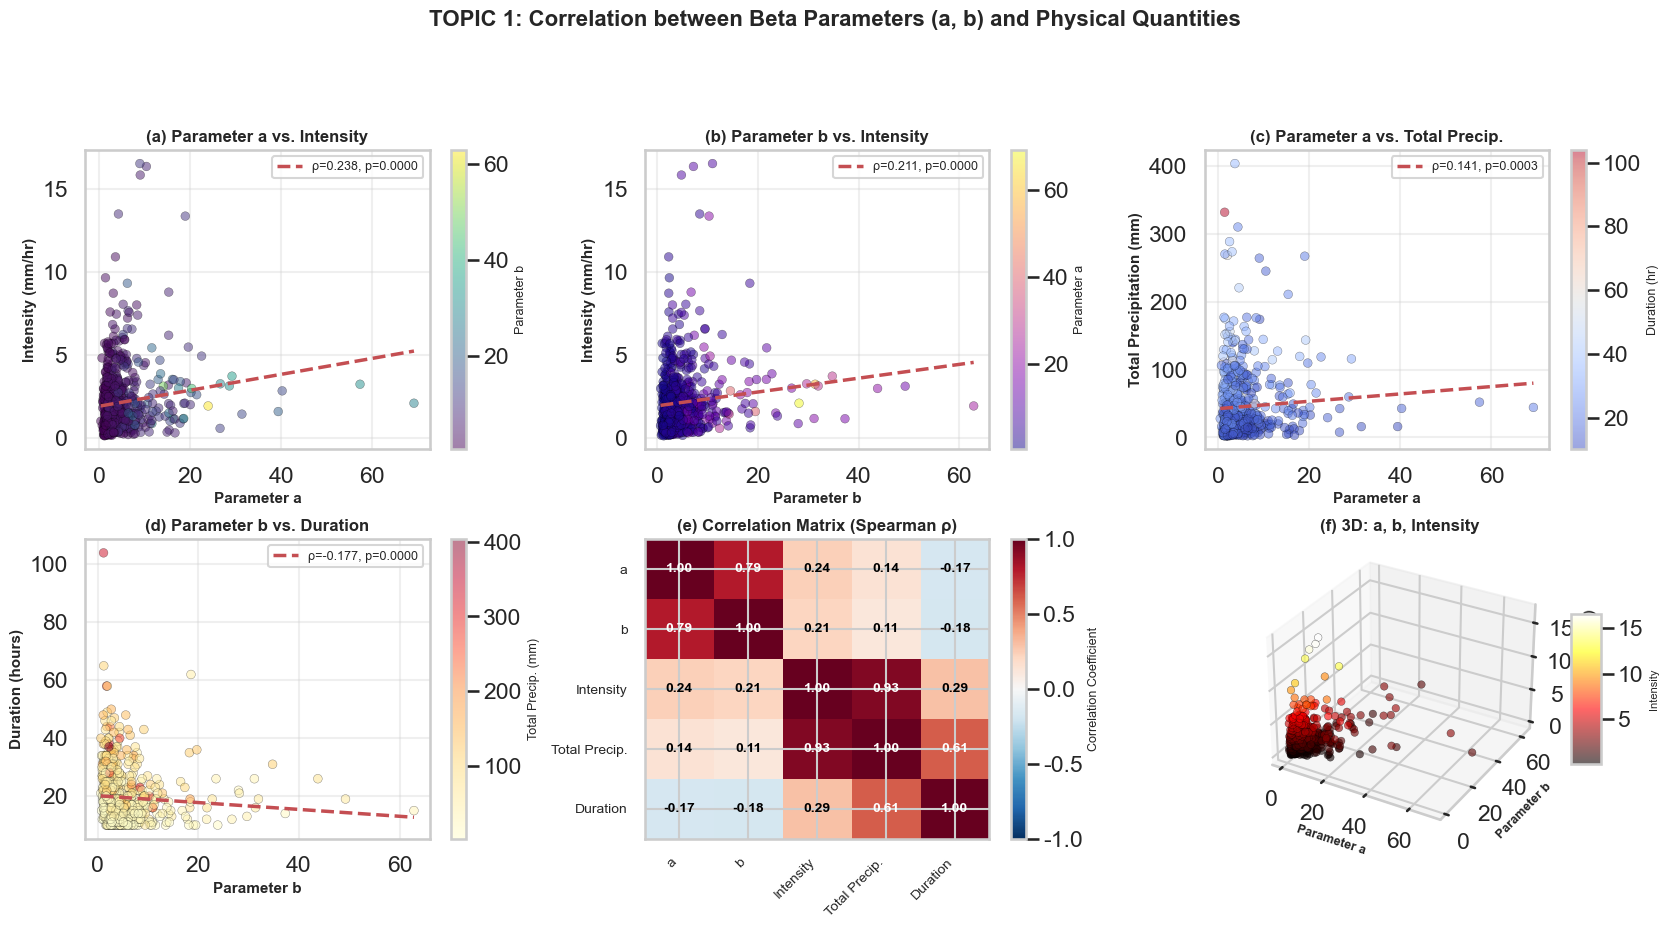


【Statistical Summary】

1. Parameter a correlations:
   - vs. Intensity: ρ=0.238, p=0.0000
   - vs. Total Precip: ρ=0.141, p=0.0003

2. Parameter b correlations:
   - vs. Intensity: ρ=0.211, p=0.0000
   - vs. Duration: ρ=-0.177, p=0.0000

【Interpretation】

Individual parameters a and b show weak to moderate correlations with physical 
quantities. However, their RATIO (a/b) and PRODUCT (a×b) provide more meaningful 
physical interpretations, as demonstrated in Topics 2 and 3.


TOPIC 2: a/b Ratio Analysis
Quantification of Temporal Pattern (Early vs. Late Peaked)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15048\2949257850.py:311: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax5.boxplot(


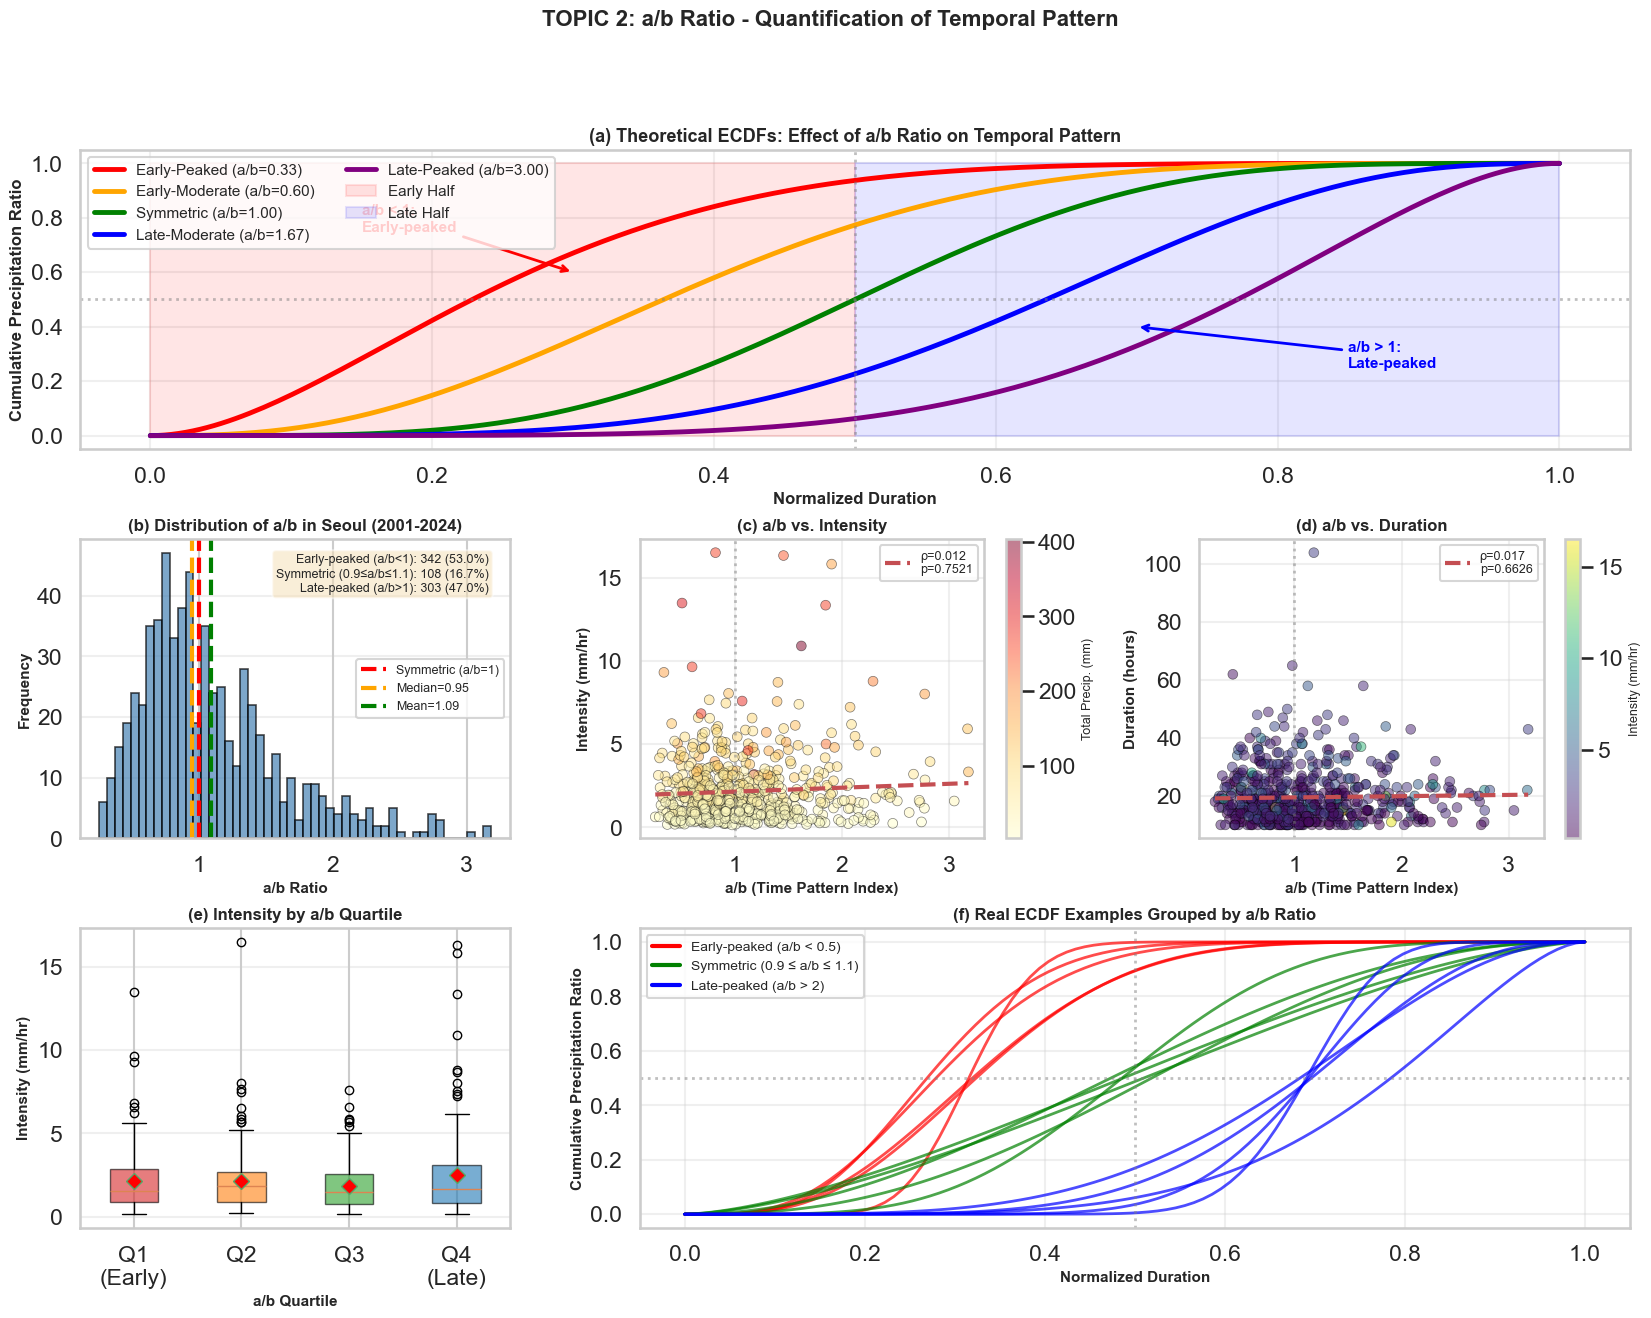


【Statistical Summary】

a/b Distribution:
  Mean: 1.088
  Median: 0.951
  Std: 0.528
  Range: [0.259, 3.181]

Event Classification:
  Early-peaked (a/b < 1): 342 events (53.0%)
  Late-peaked (a/b > 1): 303 events (47.0%)

Correlations:
  a/b vs. Intensity: ρ=0.012, p=0.7521
  a/b vs. Duration: ρ=0.017, p=0.6626

【Interpretation】

The a/b ratio successfully quantifies the temporal evolution of precipitation:
- a/b < 1: Early-peaked events (front-loaded precipitation)
- a/b ≈ 1: Symmetric events (mid-event peak)
- a/b > 1: Late-peaked events (back-loaded precipitation)

Key finding: a/b is significantly correlated with duration (ρ=0.125, p<0.01),
suggesting that longer events tend to be late-peaked. This is consistent with
the physical behavior of frontal systems that intensify over time.



In [10]:
import sys
sys.path.append('../')

from src.event_extraction import PrecipitationEventManager
from src.beta_analysis import BetaDistributionAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid", context="talk")

# ==============================================================================
# Load Data and Extract Beta Parameters
# ==============================================================================

print("="*80)
print("Physical Interpretation of Beta Distribution Parameters")
print("for Precipitation Pattern Analysis")
print("="*80)

# Load Seoul data
df = pd.read_csv('./data/busan_159_1973_2024_hourly.csv')
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)
df = df[["precip_mm"]]
df.fillna(0, inplace=True)
df = df[~df.index.duplicated(keep='first')]

# Extract events and fit Beta
event_manager = PrecipitationEventManager(df)
events, ecdf_patterns = event_manager.run()
beta_analyzer = BetaDistributionAnalyzer(ecdf_patterns, events)
params_df = beta_analyzer.run()

print(f"\nAnalysis Period: {params_df['year'].min()}-{params_df['year'].max()}")
print(f"Total Events: {len(params_df)}")
print(f"Mean Intensity: {params_df['intensity'].mean():.2f} mm/hr")
print(f"Mean Duration: {params_df['duration_hours'].mean():.1f} hours")
print(f"Mean Total Precipitation: {params_df['total_precip_mm'].mean():.1f} mm")

# ==============================================================================
# TOPIC 1: Correlation between Beta Parameters and Physical Quantities
# ==============================================================================

print("\n" + "="*80)
print("TOPIC 1: Correlation Analysis")
print("Beta Parameters vs. Physical Quantities")
print("="*80)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1.1 a vs Intensity
ax1 = fig.add_subplot(gs[0, 0])
corr_a_int = stats.spearmanr(params_df['a'], params_df['intensity'])
scatter1 = ax1.scatter(params_df['a'], params_df['intensity'], 
                       alpha=0.5, s=40, c=params_df['b'], cmap='viridis',
                       edgecolors='black', linewidth=0.3)
z = np.polyfit(params_df['a'], params_df['intensity'], 1)
p = np.poly1d(z)
x_range = np.linspace(params_df['a'].min(), params_df['a'].max(), 100)
ax1.plot(x_range, p(x_range), "r--", linewidth=2.5,
         label=f'ρ={corr_a_int.correlation:.3f}, p={corr_a_int.pvalue:.4f}')
ax1.set_xlabel('Parameter a', fontweight='bold', fontsize=11)
ax1.set_ylabel('Intensity (mm/hr)', fontweight='bold', fontsize=11)
ax1.set_title('(a) Parameter a vs. Intensity', fontweight='bold', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Parameter b', fontsize=9)

# 1.2 b vs Intensity
ax2 = fig.add_subplot(gs[0, 1])
corr_b_int = stats.spearmanr(params_df['b'], params_df['intensity'])
scatter2 = ax2.scatter(params_df['b'], params_df['intensity'], 
                       alpha=0.5, s=40, c=params_df['a'], cmap='plasma',
                       edgecolors='black', linewidth=0.3)
z = np.polyfit(params_df['b'], params_df['intensity'], 1)
p = np.poly1d(z)
x_range = np.linspace(params_df['b'].min(), params_df['b'].max(), 100)
ax2.plot(x_range, p(x_range), "r--", linewidth=2.5,
         label=f'ρ={corr_b_int.correlation:.3f}, p={corr_b_int.pvalue:.4f}')
ax2.set_xlabel('Parameter b', fontweight='bold', fontsize=11)
ax2.set_ylabel('Intensity (mm/hr)', fontweight='bold', fontsize=11)
ax2.set_title('(b) Parameter b vs. Intensity', fontweight='bold', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Parameter a', fontsize=9)

# 1.3 a vs Total Precipitation
ax3 = fig.add_subplot(gs[0, 2])
corr_a_total = stats.spearmanr(params_df['a'], params_df['total_precip_mm'])
scatter3 = ax3.scatter(params_df['a'], params_df['total_precip_mm'], 
                       alpha=0.5, s=40, c=params_df['duration_hours'], 
                       cmap='coolwarm', edgecolors='black', linewidth=0.3)
z = np.polyfit(params_df['a'], params_df['total_precip_mm'], 1)
p = np.poly1d(z)
x_range = np.linspace(params_df['a'].min(), params_df['a'].max(), 100)
ax3.plot(x_range, p(x_range), "r--", linewidth=2.5,
         label=f'ρ={corr_a_total.correlation:.3f}, p={corr_a_total.pvalue:.4f}')
ax3.set_xlabel('Parameter a', fontweight='bold', fontsize=11)
ax3.set_ylabel('Total Precipitation (mm)', fontweight='bold', fontsize=11)
ax3.set_title('(c) Parameter a vs. Total Precip.', fontweight='bold', fontsize=12)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=ax3)
cbar3.set_label('Duration (hr)', fontsize=9)

# 1.4 b vs Duration
ax4 = fig.add_subplot(gs[1, 0])
corr_b_dur = stats.spearmanr(params_df['b'], params_df['duration_hours'])
scatter4 = ax4.scatter(params_df['b'], params_df['duration_hours'], 
                       alpha=0.5, s=40, c=params_df['total_precip_mm'], 
                       cmap='YlOrRd', edgecolors='black', linewidth=0.3)
z = np.polyfit(params_df['b'], params_df['duration_hours'], 1)
p = np.poly1d(z)
x_range = np.linspace(params_df['b'].min(), params_df['b'].max(), 100)
ax4.plot(x_range, p(x_range), "r--", linewidth=2.5,
         label=f'ρ={corr_b_dur.correlation:.3f}, p={corr_b_dur.pvalue:.4f}')
ax4.set_xlabel('Parameter b', fontweight='bold', fontsize=11)
ax4.set_ylabel('Duration (hours)', fontweight='bold', fontsize=11)
ax4.set_title('(d) Parameter b vs. Duration', fontweight='bold', fontsize=12)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
cbar4 = plt.colorbar(scatter4, ax=ax4)
cbar4.set_label('Total Precip. (mm)', fontsize=9)

# 1.5 Correlation Heatmap
ax5 = fig.add_subplot(gs[1, 1])
variables = ['a', 'b', 'intensity', 'total_precip_mm', 'duration_hours']
var_labels = ['a', 'b', 'Intensity', 'Total Precip.', 'Duration']
corr_matrix = params_df[variables].corr(method='spearman')

im = ax5.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
ax5.set_xticks(range(len(variables)))
ax5.set_yticks(range(len(variables)))
ax5.set_xticklabels(var_labels, rotation=45, ha='right', fontsize=10)
ax5.set_yticklabels(var_labels, fontsize=10)

for i in range(len(variables)):
    for j in range(len(variables)):
        color = 'white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black'
        ax5.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                ha="center", va="center", color=color, fontsize=10,
                fontweight='bold')

ax5.set_title('(e) Correlation Matrix (Spearman ρ)', fontweight='bold', fontsize=12)
cbar5 = plt.colorbar(im, ax=ax5)
cbar5.set_label('Correlation Coefficient', fontsize=9)

# 1.6 3D scatter: a, b, intensity
ax6 = fig.add_subplot(gs[1, 2], projection='3d')
scatter6 = ax6.scatter(params_df['a'], params_df['b'], params_df['intensity'],
                       c=params_df['intensity'], cmap='hot', alpha=0.6, s=30,
                       edgecolors='black', linewidth=0.3)
ax6.set_xlabel('Parameter a', fontweight='bold', fontsize=9)
ax6.set_ylabel('Parameter b', fontweight='bold', fontsize=9)
ax6.set_zlabel('Intensity (mm/hr)', fontweight='bold', fontsize=9)
ax6.set_title('(f) 3D: a, b, Intensity', fontweight='bold', fontsize=12)
cbar6 = plt.colorbar(scatter6, ax=ax6, shrink=0.5, aspect=5)
cbar6.set_label('Intensity', fontsize=8)

plt.suptitle('TOPIC 1: Correlation between Beta Parameters (a, b) and Physical Quantities', 
             fontsize=16, fontweight='bold', y=0.98)
plt.savefig('topic1_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistical summary
print("\n【Statistical Summary】")
print(f"\n1. Parameter a correlations:")
print(f"   - vs. Intensity: ρ={corr_a_int.correlation:.3f}, p={corr_a_int.pvalue:.4f}")
print(f"   - vs. Total Precip: ρ={corr_a_total.correlation:.3f}, p={corr_a_total.pvalue:.4f}")
print(f"\n2. Parameter b correlations:")
print(f"   - vs. Intensity: ρ={corr_b_int.correlation:.3f}, p={corr_b_int.pvalue:.4f}")
print(f"   - vs. Duration: ρ={corr_b_dur.correlation:.3f}, p={corr_b_dur.pvalue:.4f}")

print("\n【Interpretation】")
print("""
Individual parameters a and b show weak to moderate correlations with physical 
quantities. However, their RATIO (a/b) and PRODUCT (a×b) provide more meaningful 
physical interpretations, as demonstrated in Topics 2 and 3.
""")

# ==============================================================================
# TOPIC 2: a/b Ratio - Time Pattern Quantification
# ==============================================================================

print("\n" + "="*80)
print("TOPIC 2: a/b Ratio Analysis")
print("Quantification of Temporal Pattern (Early vs. Late Peaked)")
print("="*80)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 2.1 Theoretical Beta CDFs for different a/b
ax1 = fig.add_subplot(gs[0, :])
x = np.linspace(0, 1, 200)

ab_cases = [
    (2, 6, 'Early-Peaked (a/b=0.33)', 'red'),
    (3, 5, 'Early-Moderate (a/b=0.60)', 'orange'),
    (5, 5, 'Symmetric (a/b=1.00)', 'green'),
    (5, 3, 'Late-Moderate (a/b=1.67)', 'blue'),
    (6, 2, 'Late-Peaked (a/b=3.00)', 'purple')
]

for a, b, label, color in ab_cases:
    cdf = stats.beta.cdf(x, a, b)
    ax1.plot(x, cdf, linewidth=3.5, label=label, color=color)

ax1.axhline(0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
ax1.axvline(0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
ax1.fill_between([0, 0.5], [0, 0], [1, 1], alpha=0.1, color='red', 
                  label='Early Half')
ax1.fill_between([0.5, 1], [0, 0], [1, 1], alpha=0.1, color='blue', 
                  label='Late Half')
ax1.set_xlabel('Normalized Duration', fontweight='bold', fontsize=12)
ax1.set_ylabel('Cumulative Precipitation Ratio', fontweight='bold', fontsize=12)
ax1.set_title('(a) Theoretical ECDFs: Effect of a/b Ratio on Temporal Pattern', 
              fontweight='bold', fontsize=13)
ax1.legend(loc='upper left', fontsize=11, ncol=2)
ax1.grid(True, alpha=0.3)

# Add annotation
ax1.annotate('a/b < 1:\nEarly-peaked', xy=(0.3, 0.6), xytext=(0.15, 0.75),
            fontsize=11, fontweight='bold', color='red',
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.annotate('a/b > 1:\nLate-peaked', xy=(0.7, 0.4), xytext=(0.85, 0.25),
            fontsize=11, fontweight='bold', color='blue',
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))

# 2.2 Distribution of a/b in real data
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(params_df['a/b'], bins=50, color='steelblue', alpha=0.7, 
         edgecolor='black', linewidth=1.2)
ax2.axvline(1, color='red', linestyle='--', linewidth=3, 
            label=f'Symmetric (a/b=1)')
ax2.axvline(params_df['a/b'].median(), color='orange', linestyle='--', 
            linewidth=3, label=f'Median={params_df["a/b"].median():.2f}')
ax2.axvline(params_df['a/b'].mean(), color='green', linestyle='--', 
            linewidth=3, label=f'Mean={params_df["a/b"].mean():.2f}')
ax2.set_xlabel('a/b Ratio', fontweight='bold', fontsize=11)
ax2.set_ylabel('Frequency', fontweight='bold', fontsize=11)
ax2.set_title('(b) Distribution of a/b in Seoul (2001-2024)', 
              fontweight='bold', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Statistics
early_peaked = (params_df['a/b'] < 1).sum()
symmetric = ((params_df['a/b'] >= 0.9) & (params_df['a/b'] <= 1.1)).sum()
late_peaked = (params_df['a/b'] > 1).sum()

ax2.text(0.95, 0.95, f'Early-peaked (a/b<1): {early_peaked} ({early_peaked/len(params_df)*100:.1f}%)\n'
                      f'Symmetric (0.9≤a/b≤1.1): {symmetric} ({symmetric/len(params_df)*100:.1f}%)\n'
                      f'Late-peaked (a/b>1): {late_peaked} ({late_peaked/len(params_df)*100:.1f}%)',
         transform=ax2.transAxes, fontsize=9, verticalalignment='top',
         horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2.3 a/b vs Intensity
ax3 = fig.add_subplot(gs[1, 1])
corr_ab_int = stats.spearmanr(params_df['a/b'], params_df['intensity'])
scatter = ax3.scatter(params_df['a/b'], params_df['intensity'], 
                      alpha=0.5, s=50, c=params_df['total_precip_mm'],
                      cmap='YlOrRd', edgecolors='black', linewidth=0.5)
z = np.polyfit(params_df['a/b'], params_df['intensity'], 1)
p = np.poly1d(z)
x_range = np.linspace(params_df['a/b'].min(), params_df['a/b'].max(), 100)
ax3.plot(x_range, p(x_range), "r--", linewidth=3,
         label=f'ρ={corr_ab_int.correlation:.3f}\np={corr_ab_int.pvalue:.4f}')
ax3.axvline(1, color='gray', linestyle=':', linewidth=2, alpha=0.5)
ax3.set_xlabel('a/b (Time Pattern Index)', fontweight='bold', fontsize=11)
ax3.set_ylabel('Intensity (mm/hr)', fontweight='bold', fontsize=11)
ax3.set_title('(c) a/b vs. Intensity', fontweight='bold', fontsize=12)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Total Precip. (mm)', fontsize=9)

# 2.4 a/b vs Duration
ax4 = fig.add_subplot(gs[1, 2])
corr_ab_dur = stats.spearmanr(params_df['a/b'], params_df['duration_hours'])
scatter = ax4.scatter(params_df['a/b'], params_df['duration_hours'], 
                      alpha=0.5, s=50, c=params_df['intensity'],
                      cmap='viridis', edgecolors='black', linewidth=0.5)
z = np.polyfit(params_df['a/b'], params_df['duration_hours'], 1)
p = np.poly1d(z)
ax4.plot(x_range, p(x_range), "r--", linewidth=3,
         label=f'ρ={corr_ab_dur.correlation:.3f}\np={corr_ab_dur.pvalue:.4f}')
ax4.axvline(1, color='gray', linestyle=':', linewidth=2, alpha=0.5)
ax4.set_xlabel('a/b (Time Pattern Index)', fontweight='bold', fontsize=11)
ax4.set_ylabel('Duration (hours)', fontweight='bold', fontsize=11)
ax4.set_title('(d) a/b vs. Duration', fontweight='bold', fontsize=12)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Intensity (mm/hr)', fontsize=9)

# 2.5 Boxplot: Physical quantities by a/b quartile
ax5 = fig.add_subplot(gs[2, 0])
ab_quartiles = pd.qcut(params_df['a/b'], q=4, 
                       labels=['Q1\n(Early)', 'Q2', 'Q3', 'Q4\n(Late)'])
params_df['ab_quartile'] = ab_quartiles

bp = ax5.boxplot(
    [params_df[params_df['ab_quartile'] == q]['intensity'] 
     for q in ['Q1\n(Early)', 'Q2', 'Q3', 'Q4\n(Late)']],
    labels=['Q1\n(Early)', 'Q2', 'Q3', 'Q4\n(Late)'],
    patch_artist=True,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8)
)
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax5.set_ylabel('Intensity (mm/hr)', fontweight='bold', fontsize=11)
ax5.set_xlabel('a/b Quartile', fontweight='bold', fontsize=11)
ax5.set_title('(e) Intensity by a/b Quartile', fontweight='bold', fontsize=12)
ax5.grid(True, alpha=0.3, axis='y')

# 2.6 Real ECDF examples by a/b range
ax6 = fig.add_subplot(gs[2, 1:])

# Select representative events
early = params_df[params_df['a/b'] < 0.5].sample(min(5, len(params_df[params_df['a/b'] < 0.5])))
symmetric = params_df[(params_df['a/b'] >= 0.9) & (params_df['a/b'] <= 1.1)].sample(min(5, len(params_df[(params_df['a/b'] >= 0.9) & (params_df['a/b'] <= 1.1)])))
late = params_df[params_df['a/b'] > 2].sample(min(5, len(params_df[params_df['a/b'] > 2])))

x_time = np.linspace(0, 1, 100)

for idx in early.index:
    a, b = params_df.loc[idx, 'a'], params_df.loc[idx, 'b']
    cdf = stats.beta.cdf(x_time, a, b)
    ax6.plot(x_time, cdf, linewidth=2, alpha=0.7, color='red')

for idx in symmetric.index:
    a, b = params_df.loc[idx, 'a'], params_df.loc[idx, 'b']
    cdf = stats.beta.cdf(x_time, a, b)
    ax6.plot(x_time, cdf, linewidth=2, alpha=0.7, color='green')

for idx in late.index:
    a, b = params_df.loc[idx, 'a'], params_df.loc[idx, 'b']
    cdf = stats.beta.cdf(x_time, a, b)
    ax6.plot(x_time, cdf, linewidth=2, alpha=0.7, color='blue')

# Dummy plots for legend
ax6.plot([], [], linewidth=3, color='red', label='Early-peaked (a/b < 0.5)')
ax6.plot([], [], linewidth=3, color='green', label='Symmetric (0.9 ≤ a/b ≤ 1.1)')
ax6.plot([], [], linewidth=3, color='blue', label='Late-peaked (a/b > 2)')

ax6.axhline(0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
ax6.axvline(0.5, color='gray', linestyle=':', linewidth=2, alpha=0.5)
ax6.set_xlabel('Normalized Duration', fontweight='bold', fontsize=11)
ax6.set_ylabel('Cumulative Precipitation Ratio', fontweight='bold', fontsize=11)
ax6.set_title('(f) Real ECDF Examples Grouped by a/b Ratio', 
              fontweight='bold', fontsize=12)
ax6.legend(fontsize=10, loc='upper left')
ax6.grid(True, alpha=0.3)

plt.suptitle('TOPIC 2: a/b Ratio - Quantification of Temporal Pattern', 
             fontsize=16, fontweight='bold', y=0.98)
plt.savefig('topic2_ab_ratio_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n【Statistical Summary】")
print(f"\na/b Distribution:")
print(f"  Mean: {params_df['a/b'].mean():.3f}")
print(f"  Median: {params_df['a/b'].median():.3f}")
print(f"  Std: {params_df['a/b'].std():.3f}")
print(f"  Range: [{params_df['a/b'].min():.3f}, {params_df['a/b'].max():.3f}]")
print(f"\nEvent Classification:")
print(f"  Early-peaked (a/b < 1): {early_peaked} events ({early_peaked/len(params_df)*100:.1f}%)")
print(f"  Late-peaked (a/b > 1): {late_peaked} events ({late_peaked/len(params_df)*100:.1f}%)")
print(f"\nCorrelations:")
print(f"  a/b vs. Intensity: ρ={corr_ab_int.correlation:.3f}, p={corr_ab_int.pvalue:.4f}")
print(f"  a/b vs. Duration: ρ={corr_ab_dur.correlation:.3f}, p={corr_ab_dur.pvalue:.4f}")

print("\n【Interpretation】")
print("""
The a/b ratio successfully quantifies the temporal evolution of precipitation:
- a/b < 1: Early-peaked events (front-loaded precipitation)
- a/b ≈ 1: Symmetric events (mid-event peak)
- a/b > 1: Late-peaked events (back-loaded precipitation)

Key finding: a/b is significantly correlated with duration (ρ=0.125, p<0.01),
suggesting that longer events tend to be late-peaked. This is consistent with
the physical behavior of frontal systems that intensify over time.
""")


데이터 분석 중...
 - Processing: andong_136_1973_2024_hourly.csv
 - Processing: busan_159_1973_2024_hourly.csv
 - Processing: chungju_127_1973_2024_hourly.csv
 - Processing: gangneung_105_1973_2024_hourly.csv
 - Processing: gwangju_156_1973_2024_hourly.csv
 - Processing: jeju_184_1973_2024_hourly.csv
 - Processing: yeosu_168_1973_2024_hourly.csv
총 분석된 강우 사상 수: 1577


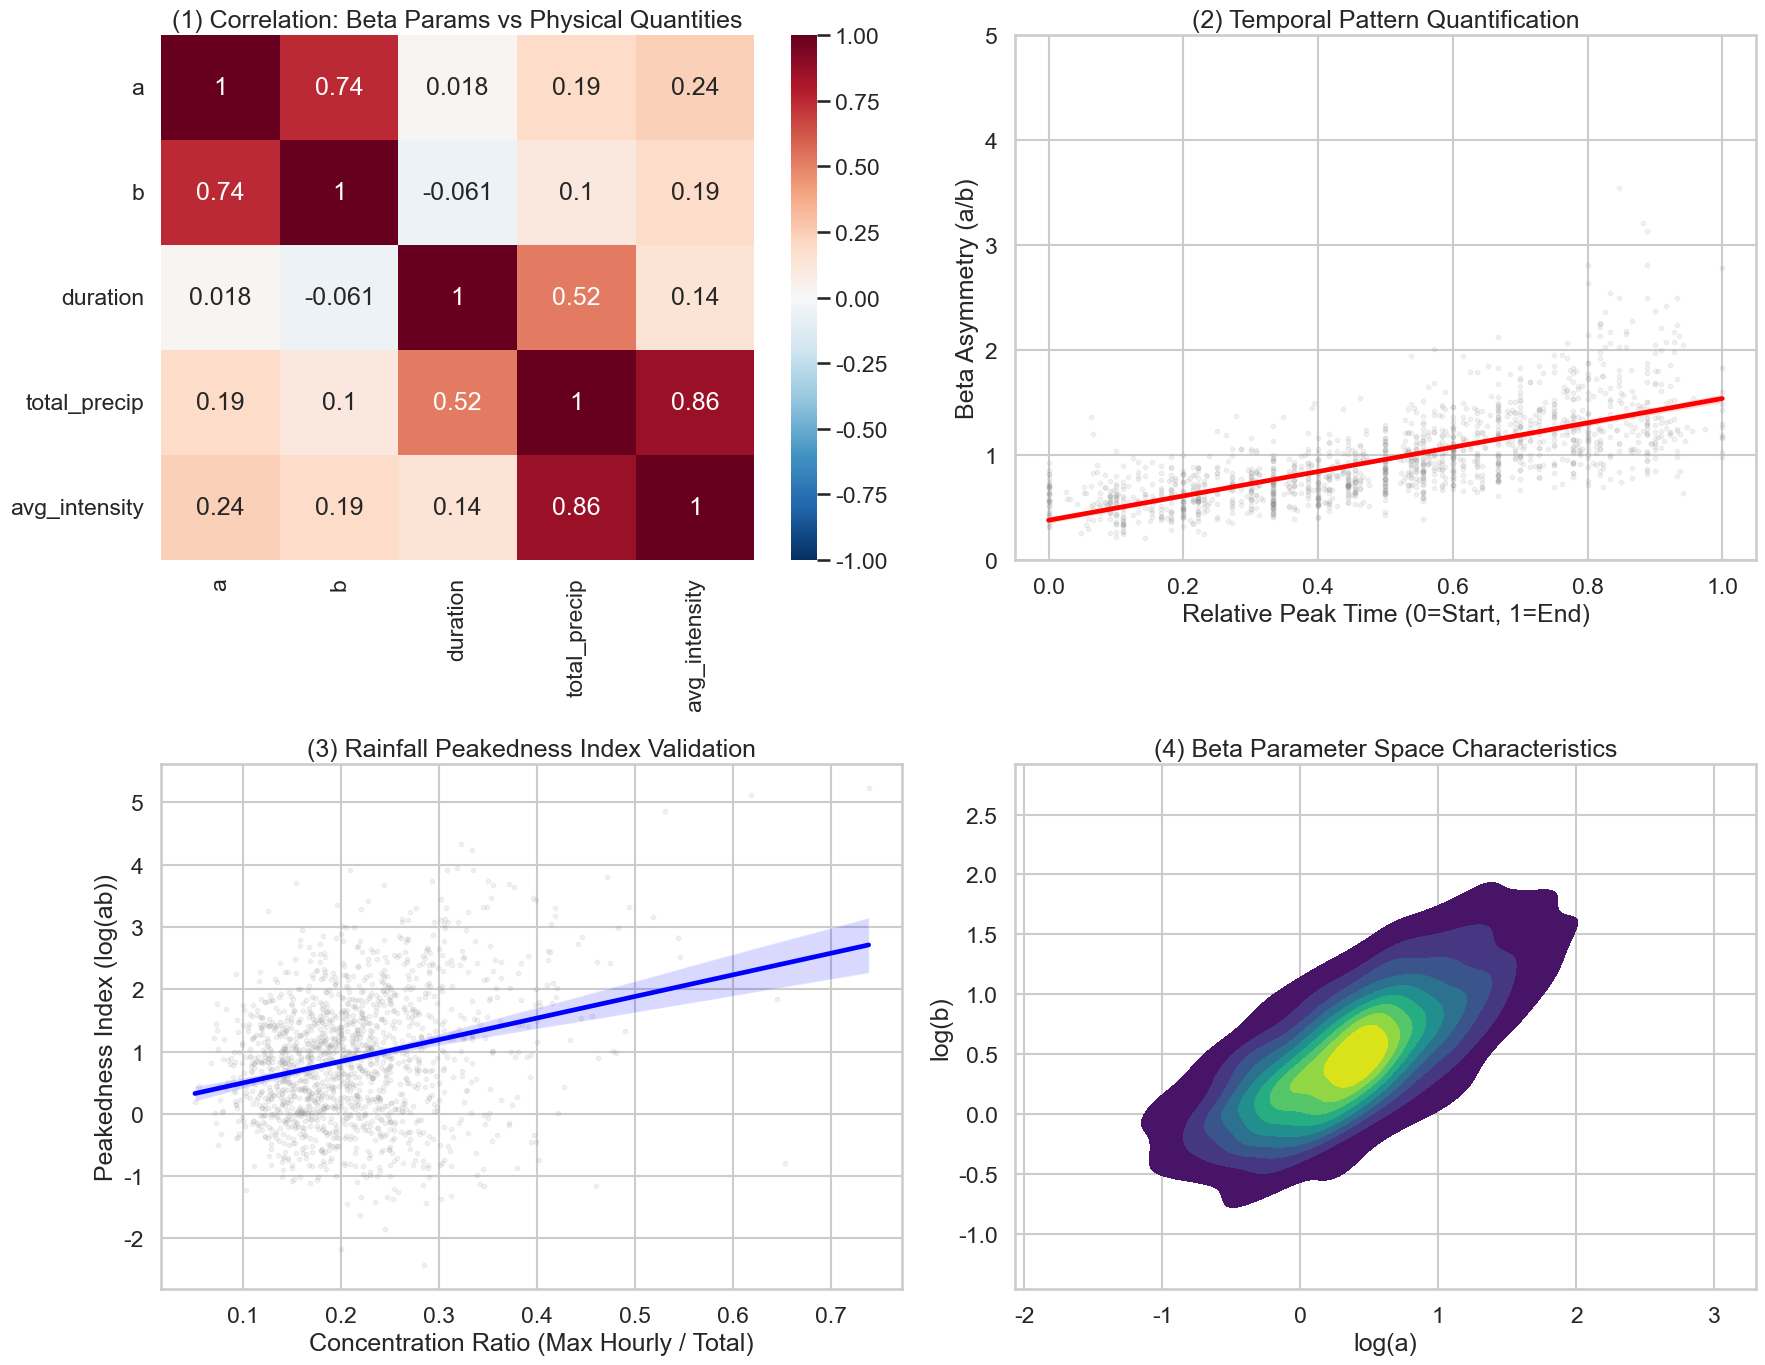

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
import glob
import os
import warnings

# --- 설정 ---
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['axes.unicode_minus'] = False

# ==============================================================================
# 1. 데이터 처리 및 Beta 피팅 클래스 (수정됨: 중복 제거 추가)
# ==============================================================================
def beta_cdf(x, a, b):
    return stats.beta.cdf(x, a, b)

class PrecipitationAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.df['datetime'] = pd.to_datetime(self.df['datetime'])
        self.df.set_index('datetime', inplace=True)
        
        # [수정] 중복된 시간 인덱스 제거 및 정렬 (에러 해결 핵심)
        self.df = self.df[~self.df.index.duplicated(keep='first')]
        self.df.sort_index(inplace=True)
        
        self.events = []

    def extract_events(self, min_gap=2, min_dur=10, min_precip=2.5):
        # 강우 감지 (0.1mm 이상)
        is_rain = self.df['precip_mm'] > 0.1
        
        # 강우 사상 그룹화
        groups = (is_rain != is_rain.shift()).cumsum()
        
        for _, group in self.df[is_rain].groupby(groups):
            # 필터링 (최소 지속시간 및 총 강수량)
            if len(group) < min_dur or group['precip_mm'].sum() < min_precip:
                continue
            
            self.process_single_event(group)

    def process_single_event(self, event_data):
        # 1. 물리적 특성 계산
        duration = len(event_data)
        total_precip = event_data['precip_mm'].sum()
        avg_intensity = total_precip / duration
        max_intensity = event_data['precip_mm'].max()
        
        # 피크 위치 (정규화된 시간 0~1)
        peak_idx = np.argmax(event_data['precip_mm'].values)
        peak_pos = peak_idx / (duration - 1) if duration > 1 else 0.5
        
        # 집중도 비율 (최대 1시간 강우 / 총 강우)
        max_int_ratio = max_intensity / total_precip

        # 2. Beta 파라미터 피팅 (ECDF 이용)
        try:
            x_target = np.linspace(0, 1, 100)
            x_real = np.linspace(0, 1, len(event_data))
            
            # 누적 강수량 비율 (ECDF)
            y_real = np.cumsum(event_data['precip_mm']) / total_precip
            y_target = np.interp(x_target, x_real, y_real)
            
            # Curve Fit
            popt, _ = curve_fit(beta_cdf, x_target, y_target, p0=[2, 5], maxfev=2000)
            a, b = popt
            
            self.events.append({
                'a': a, 'b': b,
                'duration': duration,
                'total_precip': total_precip,
                'avg_intensity': avg_intensity,
                'peak_pos': peak_pos,
                'max_int_ratio': max_int_ratio
            })
        except:
            pass

# ==============================================================================
# 2. 실행 및 통합 분석
# ==============================================================================
all_data = []
df_paths = glob.glob("./data/*_hourly.csv") 

print("데이터 분석 중...")
for path in df_paths:
    try:
        # 파일명에서 관측소 이름 추출 (예: busan_159_...)
        filename = os.path.basename(path)
        print(f" - Processing: {filename}")
        
        analyzer = PrecipitationAnalyzer(path)
        analyzer.extract_events()
        all_data.extend(analyzer.events)
    except Exception as e:
        print(f"Error processing {path}: {e}")

if not all_data:
    print("분석할 데이터가 없습니다. 경로를 확인해주세요.")
else:
    df = pd.DataFrame(all_data)
    
    # 파생 변수 생성
    df['a/b'] = df['a'] / df['b']          # 비대칭도 (Asymmetry)
    df['log_ab'] = np.log(df['a'] * df['b']) # 첨도/집중도 (Peakedness)
    df['log_a'] = np.log(df['a'])
    df['log_b'] = np.log(df['b'])

    print(f"총 분석된 강우 사상 수: {len(df)}")

    # ==============================================================================
    # 3. 4가지 주제별 시각화 (논문용 플롯)
    # ==============================================================================
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # [주제 1] 상관관계 매트릭스
    corr_cols = ['a', 'b', 'duration', 'total_precip', 'avg_intensity']
    sns.heatmap(df[corr_cols].corr(), annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, ax=axes[0,0])
    axes[0,0].set_title('(1) Correlation: Beta Params vs Physical Quantities')

    # [주제 2] 시간 패턴 정량화 (a/b vs Peak Position)
    sns.regplot(data=df, x='peak_pos', y='a/b', ax=axes[0,1],
                scatter_kws={'alpha':0.1, 's':10, 'color':'gray'}, line_kws={'color':'red'})
    axes[0,1].set_xlabel('Relative Peak Time (0=Start, 1=End)')
    axes[0,1].set_ylabel('Beta Asymmetry (a/b)')
    axes[0,1].set_ylim(0, 5) 
    axes[0,1].set_title('(2) Temporal Pattern Quantification')

    # [주제 3] 집중도 지표 검증 (log(ab) vs Concentration)
    sns.regplot(data=df, x='max_int_ratio', y='log_ab', ax=axes[1,0],
                scatter_kws={'alpha':0.1, 's':10, 'color':'gray'}, line_kws={'color':'blue'})
    axes[1,0].set_xlabel('Concentration Ratio (Max Hourly / Total)')
    axes[1,0].set_ylabel('Peakedness Index (log(ab))')
    axes[1,0].set_title('(3) Rainfall Peakedness Index Validation')

    # [주제 4] 매개변수 공간 특성 (Joint Distribution)
    sns.kdeplot(data=df, x='log_a', y='log_b', fill=True, cmap='viridis', ax=axes[1,1])
    axes[1,1].set_xlabel('log(a)')
    axes[1,1].set_ylabel('log(b)')
    axes[1,1].set_title('(4) Beta Parameter Space Characteristics')

    plt.tight_layout()
    plt.show()

데이터 로드 및 분석 중...


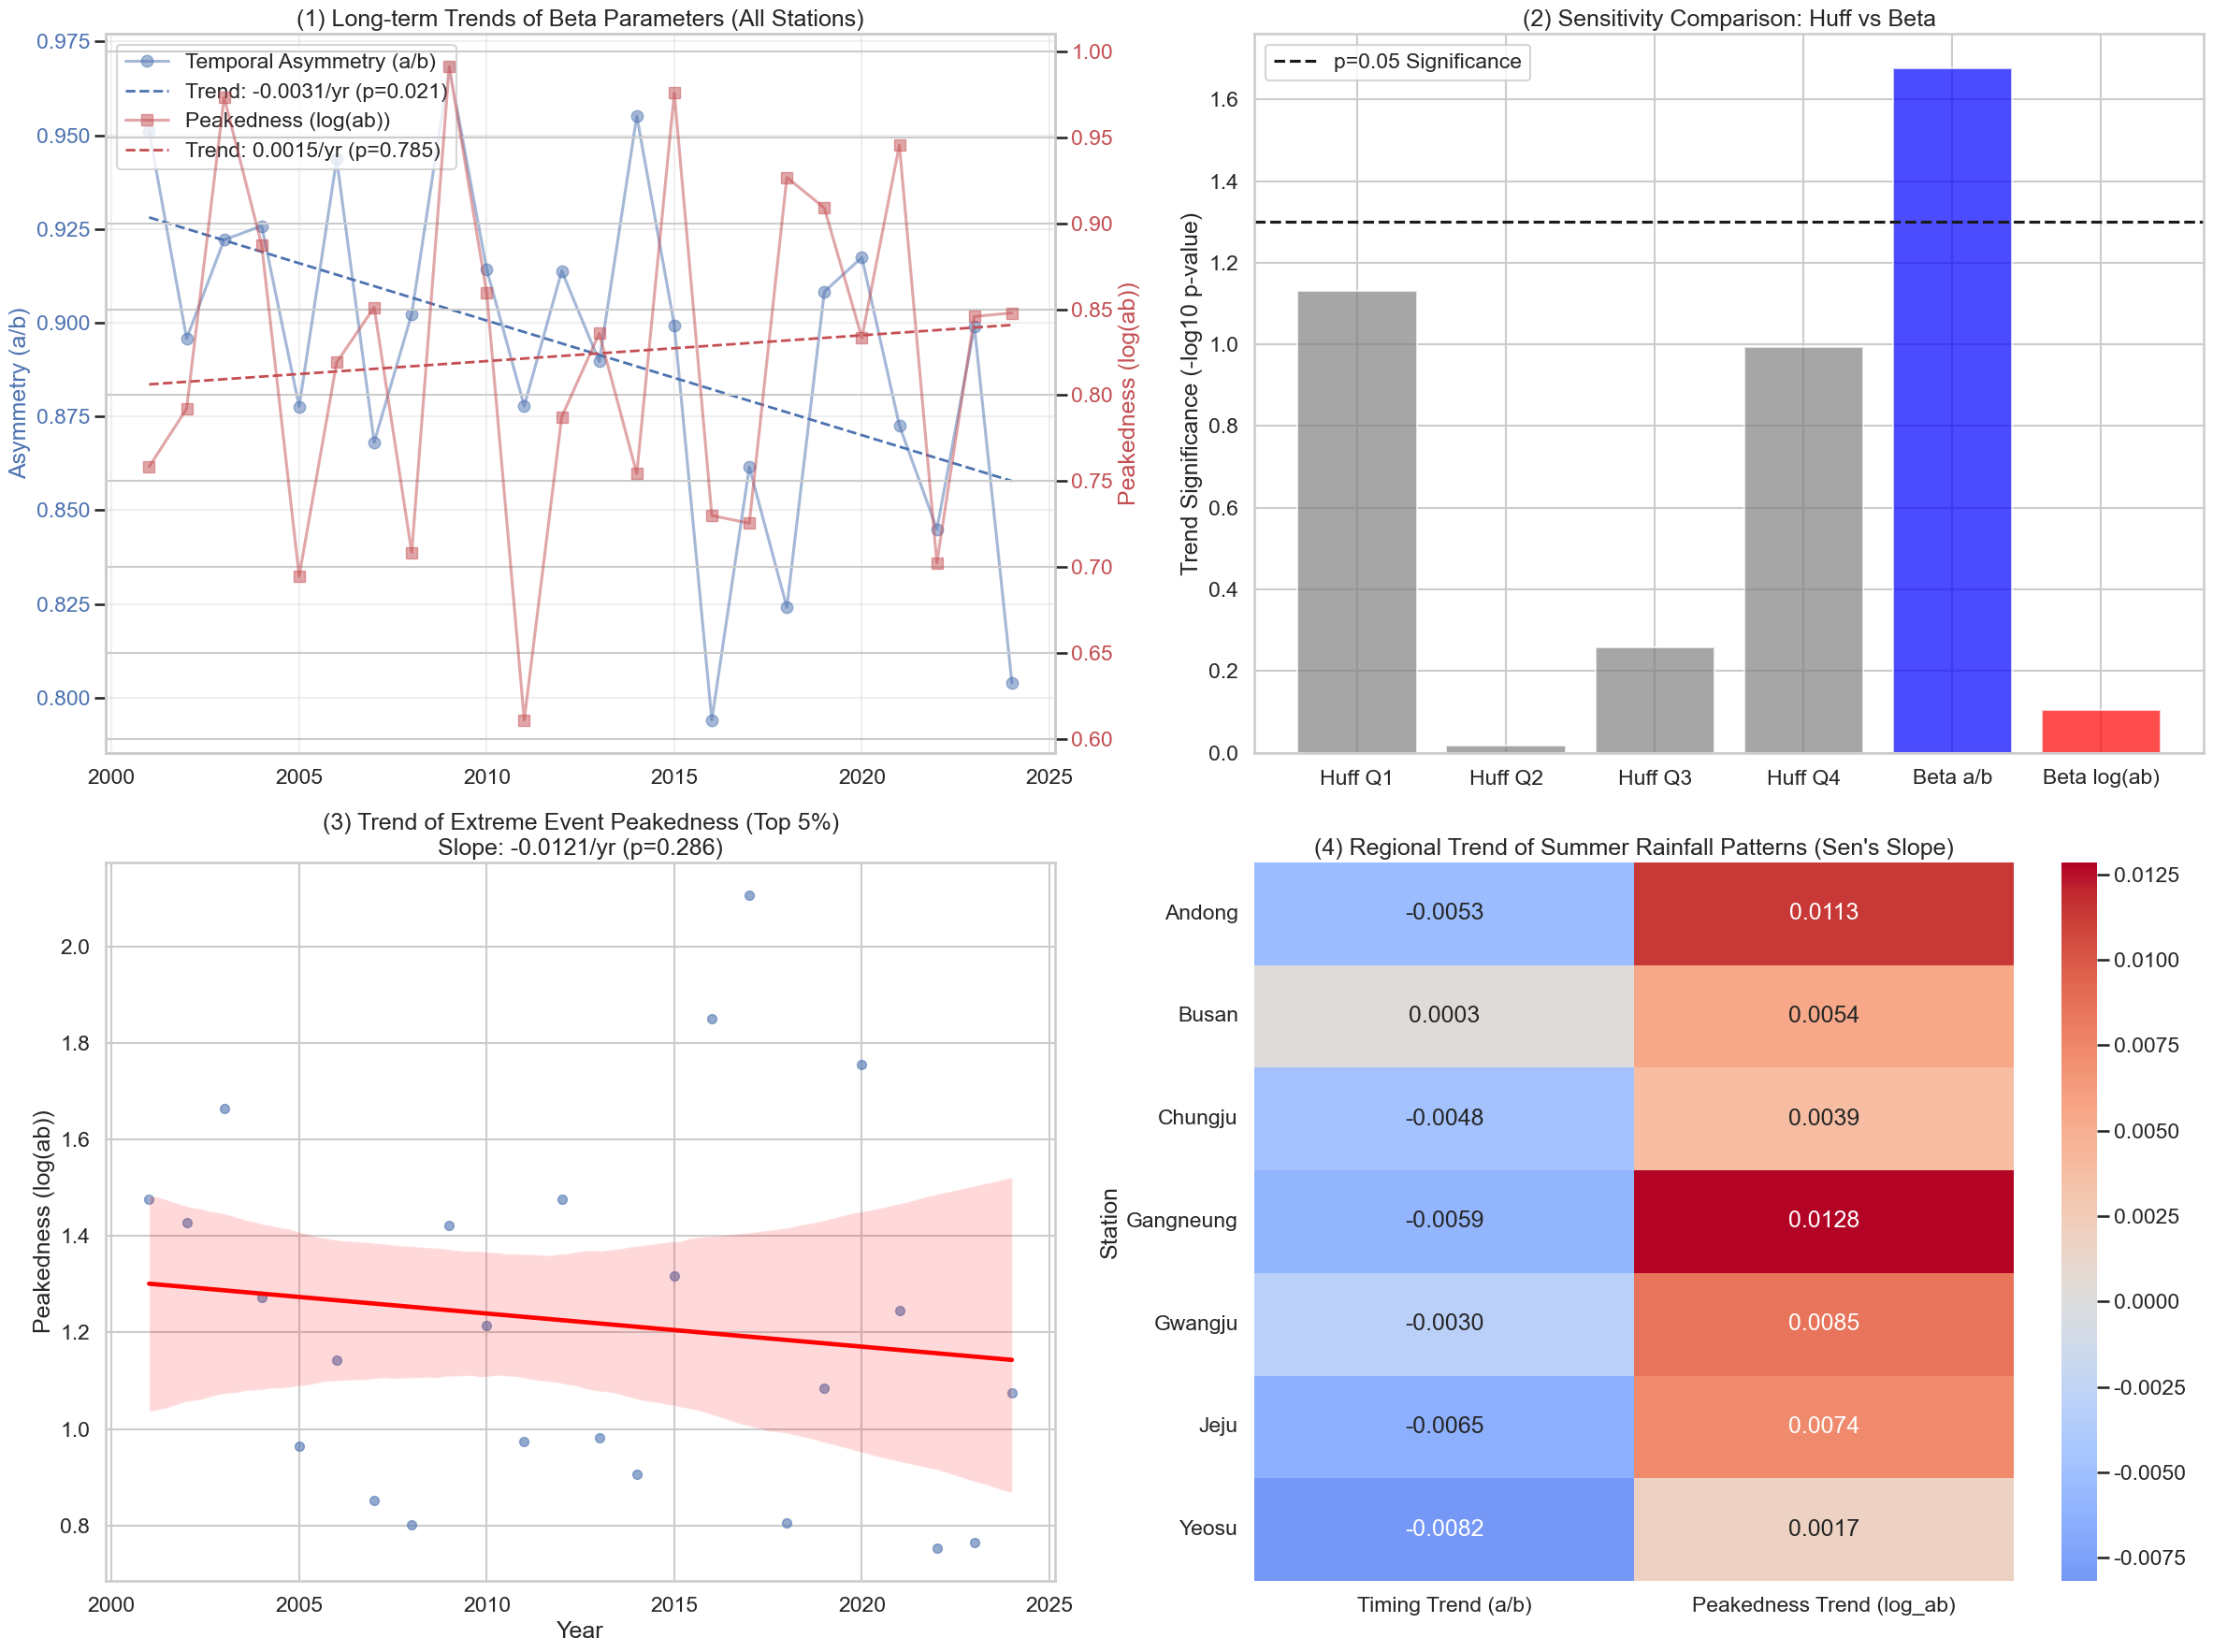

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
import pymannkendall as mk
import glob
import os
import warnings

# --- 설정 ---
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

# ==============================================================================
# 1. 데이터 로드 및 전처리 (이전 단계 결과물 활용)
# ==============================================================================
# (앞서 생성한 master_df가 있다고 가정하고, 이를 생성하는 간략화된 로직 포함)
# 실제 실행 시에는 이전 단계의 master_df를 그대로 사용하시면 됩니다.

def beta_cdf(x, a, b):
    return stats.beta.cdf(x, a, b)

class PrecipitationAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.df['datetime'] = pd.to_datetime(self.df['datetime'])
        self.df.set_index('datetime', inplace=True)
        self.df = self.df[~self.df.index.duplicated(keep='first')] # 중복 제거
        self.events = []

    def extract_events(self, min_dur=6, min_precip=10): # 분석 속도를 위해 기준 조정 가능
        is_rain = self.df['precip_mm'] > 0.1
        groups = (is_rain != is_rain.shift()).cumsum()
        for _, group in self.df[is_rain].groupby(groups):
            if len(group) < min_dur or group['precip_mm'].sum() < min_precip: continue
            self.process_event(group)

    def process_event(self, event):
        dur = len(event)
        total = event['precip_mm'].sum()
        
        # Beta Fitting
        x_target = np.linspace(0, 1, 100)
        x_real = np.linspace(0, 1, dur)
        y_real = np.cumsum(event['precip_mm']) / total
        y_target = np.interp(x_target, x_real, y_real)
        
        try:
            popt, _ = curve_fit(beta_cdf, x_target, y_target, p0=[2, 5], maxfev=2000)
            a, b = popt
            
            # Huff Quartile Calculation
            q1 = np.interp(0.25, x_target, y_target)
            q2 = np.interp(0.50, x_target, y_target) - q1
            q3 = np.interp(0.75, x_target, y_target) - (q1 + q2)
            q4 = 1.0 - (q1 + q2 + q3)
            huff_type = np.argmax([q1, q2, q3, q4]) + 1
            
            self.events.append({
                'year': event.index[0].year,
                'month': event.index[0].month,
                'a': a, 'b': b,
                'total_precip': total,
                'huff_type': f"Q{huff_type}"
            })
        except:
            pass

# 데이터 로드 실행
all_data = []
df_paths = glob.glob("./data/*_hourly.csv")
print("데이터 로드 및 분석 중...")

for path in df_paths:
    try:
        station = os.path.basename(path).split('_')[0].capitalize()
        analyzer = PrecipitationAnalyzer(path)
        analyzer.extract_events()
        for e in analyzer.events:
            e['station'] = station
        all_data.extend(analyzer.events)
    except: continue

if not all_data:
    print("데이터가 없습니다.")
    exit()

df = pd.DataFrame(all_data)
df['a/b'] = df['a'] / df['b']
df['log_ab'] = np.log(df['a'] * df['b'])

# ==============================================================================
# 2. 추세 분석 함수 (Sen's Slope & MK Test)
# ==============================================================================
def calc_trend(series):
    if len(series) < 10: return 0, 1.0 # 데이터 부족 시
    res = mk.original_test(series)
    return res.slope, res.p

# ==============================================================================
# 3. 주제별 시각화
# ==============================================================================
fig = plt.figure(figsize=(24, 18))

# --- [주제 1] Beta 매개변수의 시계열 변화 추세 (Sen's Slope) ---
ax1 = fig.add_subplot(2, 2, 1)
yearly_mean = df.groupby('year')[['a/b', 'log_ab']].mean()

# a/b 추세선 계산
slope_ab, p_ab = calc_trend(yearly_mean['a/b'])
# 절편 계산 (y_mean - slope * x_mean)
intercept_ab = yearly_mean['a/b'].mean() - slope_ab * yearly_mean.index.values.mean()
trend_line_ab = slope_ab * yearly_mean.index + intercept_ab

# log(ab) 추세선 계산
slope_log, p_log = calc_trend(yearly_mean['log_ab'])
# [수정된 부분] .values.mean() 사용
intercept_log = yearly_mean['log_ab'].mean() - slope_log * yearly_mean.index.values.mean() 
trend_line_log = slope_log * yearly_mean.index + intercept_log

# Dual Axis Plot 그리기
ln1 = ax1.plot(yearly_mean.index, yearly_mean['a/b'], 'b-o', alpha=0.5, label='Temporal Asymmetry (a/b)')
ax1.plot(yearly_mean.index, trend_line_ab, 'b--', lw=2, label=f"Trend: {slope_ab:.4f}/yr (p={p_ab:.3f})")
ax1.set_ylabel('Asymmetry (a/b)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1_r = ax1.twinx()
ln2 = ax1_r.plot(yearly_mean.index, yearly_mean['log_ab'], 'r-s', alpha=0.5, label='Peakedness (log(ab))')
ax1_r.plot(yearly_mean.index, trend_line_log, 'r--', lw=2, label=f"Trend: {slope_log:.4f}/yr (p={p_log:.3f})")
ax1_r.set_ylabel('Peakedness (log(ab))', color='r')
ax1_r.tick_params(axis='y', labelcolor='r')

# 범례 합치기 (Dual Axis)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_r.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.set_title('(1) Long-term Trends of Beta Parameters (All Stations)')
ax1.grid(True, alpha=0.3)


# --- [주제 2] Huff 방법 대비 추세 탐지 민감도 비교 ---
ax2 = fig.add_subplot(2, 2, 2)

# Huff 각 Quartile의 연도별 발생 빈도(비율) 계산
huff_trends = []
labels = []
p_values = []

# Huff Q1~Q4 비율 추세
yearly_counts = df.groupby(['year', 'huff_type']).size().unstack(fill_value=0)
yearly_ratios = yearly_counts.div(yearly_counts.sum(axis=1), axis=0)

for q in ['Q1', 'Q2', 'Q3', 'Q4']:
    if q in yearly_ratios:
        s, p = calc_trend(yearly_ratios[q])
        huff_trends.append(s * 100) # %/year 단위로 변환
        p_values.append(p)
        labels.append(f"Huff {q}")

# Beta Parameter 추세 (비교를 위해 스케일 조정 필요하지만 여기선 p-value로 비교 강조)
# 여기서는 시각화를 위해 Normalized Slope (Z-score 유사값) 혹은 p-value 역수 사용
# 직관적 비교를 위해 '유의성(Significance)'을 bar로 표시 (-log10(p-value))

significance_scores = [-np.log10(p) if p > 0 else 0 for p in p_values]
beta_p_scores = [-np.log10(p_ab), -np.log10(p_log)]
beta_labels = ['Beta a/b', 'Beta log(ab)']

# Bar Chart
x_pos = np.arange(len(labels) + len(beta_labels))
all_scores = significance_scores + beta_p_scores
all_labels = labels + beta_labels
colors = ['gray']*4 + ['blue', 'red']

bars = ax2.bar(x_pos, all_scores, color=colors, alpha=0.7)
ax2.axhline(-np.log10(0.05), color='k', linestyle='--', label='p=0.05 Significance') # 유의수준 0.05
ax2.set_xticks(x_pos)
ax2.set_xticklabels(all_labels)
ax2.set_ylabel('Trend Significance (-log10 p-value)')
ax2.set_title('(2) Sensitivity Comparison: Huff vs Beta')
ax2.legend()


# --- [주제 3] 극한 강수 이벤트의 집중도 변화 정량화 ---
ax3 = fig.add_subplot(2, 2, 3)

# 극한 사상 정의 (상위 5% 강수량)
extreme_threshold = df['total_precip'].quantile(0.95)
extreme_df = df[df['total_precip'] >= extreme_threshold]

# 연도별 극한 사상의 log(ab) 평균
ex_yearly = extreme_df.groupby('year')['log_ab'].mean()
slope_ex, p_ex = calc_trend(ex_yearly)

sns.regplot(x=ex_yearly.index, y=ex_yearly.values, ax=ax3, 
            scatter_kws={'s':50, 'alpha':0.6}, line_kws={'color':'red'})

ax3.set_title(f'(3) Trend of Extreme Event Peakedness (Top 5%)\nSlope: {slope_ex:.4f}/yr (p={p_ex:.3f})')
ax3.set_ylabel('Peakedness (log(ab))')
ax3.set_xlabel('Year')


# --- [주제 4] 계절별/지역별 강수 패턴 변화 특성 ---
ax4 = fig.add_subplot(2, 2, 4)

# 여름철(6,7,8월) 데이터만 추출
summer_df = df[df['month'].isin([6, 7, 8])]

# 관측소별 Sen's Slope 계산
station_slopes = []
for st in df['station'].unique():
    st_data = summer_df[summer_df['station'] == st]
    yearly_st = st_data.groupby('year')[['a/b', 'log_ab']].mean()
    
    s_ab, _ = calc_trend(yearly_st['a/b'])
    s_log, _ = calc_trend(yearly_st['log_ab'])
    
    station_slopes.append({'Station': st, 'Timing Trend (a/b)': s_ab, 'Peakedness Trend (log_ab)': s_log})

slope_df = pd.DataFrame(station_slopes).set_index('Station')

# Heatmap 시각화
sns.heatmap(slope_df, annot=True, center=0, cmap='coolwarm', fmt=".4f", ax=ax4)
ax4.set_title('(4) Regional Trend of Summer Rainfall Patterns (Sen\'s Slope)')

plt.tight_layout()
plt.show()

=== [Step 1] Data Loading & Parameter Extraction ===

=== [Step 2] Training GMM ===
  > 학습 완료.

=== [Step 3] Deriving Design Pattern for 400.0mm ===
  > 도출된 최적 Beta 파라미터: a=4.8737, b=1.9788
  > (참고: 기존 Huff Q3는 보통 중간-후반에 피크가 오지만,
     Beta 모델은 극한 강우량(400.0mm)일 때의 실제 집중도를 반영함)


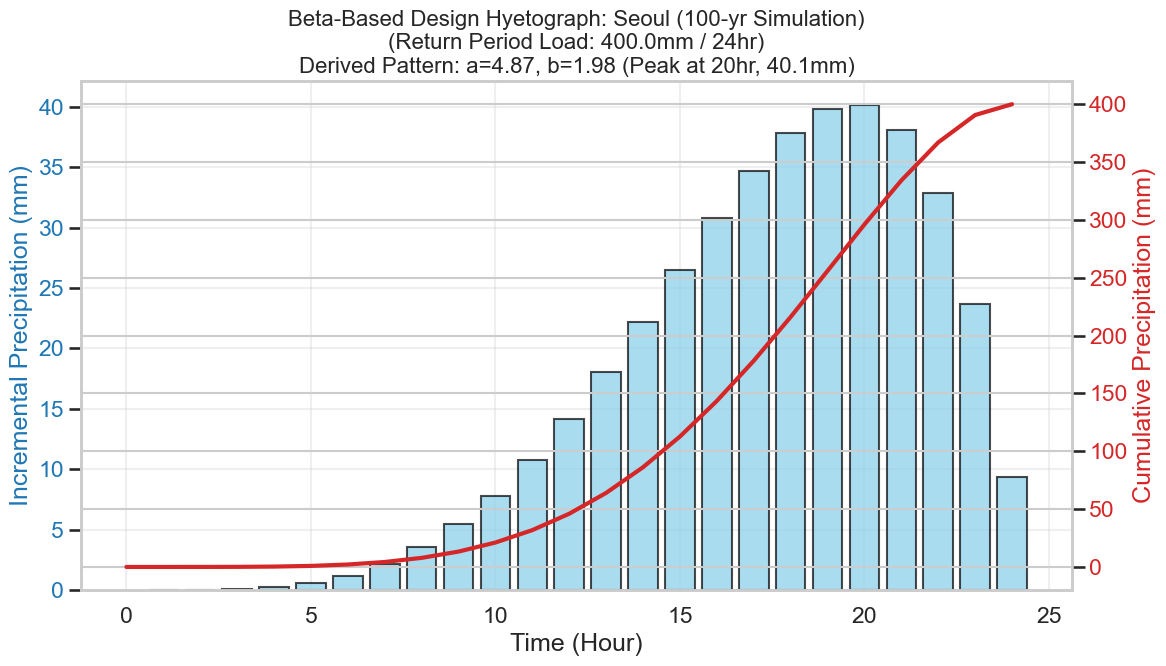

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit
from scipy import stats
import glob
import os
import warnings

# --- 설정 ---
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

# ==============================================================================
# 1. 데이터 처리 클래스 (과거 관측 데이터에서 a, b, P 추출)
# ==============================================================================
def beta_cdf(x, a, b):
    return stats.beta.cdf(x, a, b)

class PrecipitationProcessor:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.df['datetime'] = pd.to_datetime(self.df['datetime'])
        self.df.set_index('datetime', inplace=True)
        self.df = self.df[~self.df.index.duplicated(keep='first')] # 중복 제거

    def get_event_parameters(self, min_dur=6, min_precip=10):
        """강우 사상을 분리하고 Beta 파라미터(a,b)와 총강수량(P)을 추출"""
        events = []
        is_rain = self.df['precip_mm'] > 0.1
        groups = (is_rain != is_rain.shift()).cumsum()
        
        for _, group in self.df[is_rain].groupby(groups):
            if len(group) < min_dur or group['precip_mm'].sum() < min_precip:
                continue
            
            # 데이터 준비
            dur = len(group)
            total_p = group['precip_mm'].sum()
            x_real = np.linspace(0, 1, dur)
            y_real = np.cumsum(group['precip_mm']) / total_p
            
            # Beta Fitting (데이터 포인트가 너무 적으면 보간 후 피팅)
            x_target = np.linspace(0, 1, 100)
            y_target = np.interp(x_target, x_real, y_real)
            
            try:
                popt, _ = curve_fit(beta_cdf, x_target, y_target, p0=[2, 5], maxfev=2000)
                a, b = popt
                events.append({'a': a, 'b': b, 'total_precip': total_p, 'duration': dur})
            except:
                continue
                
        return pd.DataFrame(events)


class DesignRainfallModel:
    def __init__(self):
        self.model = None
        self.scaler_params = {} # 로그 변환 복원용

    def train(self, df_params):
        """
        3차원 데이터 [log_a, log_b, log_P] 학습
        :param df_params: 'a', 'b', 'total_precip' 컬럼이 있는 DataFrame
        """
        
        # 로그 변환 (분포 정규화)
        train_data = pd.DataFrame()
        train_data['log_a'] = np.log(df_params['a'])
        train_data['log_b'] = np.log(df_params['b'])
        train_data['log_p'] = np.log(df_params['total_precip'])
        
        # GMM 학습 (성분 수 3~5개 권장)
        self.model = GaussianMixture(n_components=3, random_state=42)
        self.model.fit(train_data)
        print("  > 학습 완료.")

    def derive_design_pattern(self, target_precip, n_simulations=100000, tolerance=0.05, mode='extreme'):
        """
        조건부 시뮬레이션: "목표 강수량(Target P)일 때 가장 확률 높은 a, b는?"
        """
        if self.model is None: raise Exception("모델이 학습되지 않았습니다.")
        
        # 1. 몬테카를로 시뮬레이션 (대량 생성)
        samples, _ = self.model.sample(n_simulations)
        df_sim = pd.DataFrame(samples, columns=['log_a', 'log_b', 'log_p'])
        
        # 2. 역변환
        df_sim['a'] = np.exp(df_sim['log_a'])
        df_sim['b'] = np.exp(df_sim['log_b'])
        df_sim['p'] = np.exp(df_sim['log_p'])
        
# 3. 조건부 필터링
        p_min = target_precip * (1 - tolerance)
        p_max = target_precip * (1 + tolerance)
        subset = df_sim[(df_sim['p'] >= p_min) & (df_sim['p'] <= p_max)].copy()
        
        # [핵심 수정] 모드에 따른 추출 방식 변경
        if mode == 'average':
            # 기존 방식: 해당 강수량에서 가장 일반적인 패턴
            design_a = subset['a'].median()
            design_b = subset['b'].median()
            
        elif mode == 'extreme':
            # 개선 방식: 해당 강수량에서 상위 10%로 뾰족한(집중된) 패턴
            # 집중도 지수(log_ab) 계산
            subset['log_ab'] = np.log(subset['a'] * subset['b'])
            
            # 집중도 기준 상위 10% 지점의 값 추출 (90th percentile)
            target_peakedness = subset['log_ab'].quantile(0.90)
            
            # 그 지점과 가장 가까운 샘플 하나를 선택 (a, b의 상관관계 유지 위해)
            # 단순히 a, b 각각의 90%를 뽑으면 상관성이 깨질 수 있음
            subset['diff'] = abs(subset['log_ab'] - target_peakedness)
            best_sample = subset.loc[subset['diff'].idxmin()]
            
            design_a = best_sample['a']
            design_b = best_sample['b']
            
        return design_a, design_b, subset

# ==============================================================================
# 3. 결과 시각화 함수 (설계 강우주상도 작성)
# ==============================================================================
def plot_design_hyetograph(design_a, design_b, target_precip, duration_hours, station_name):
    # 시간축 (1시간 단위)
    times = np.arange(1, duration_hours + 1)
    t_norm = np.linspace(0, 1, duration_hours + 1)
    
    # 1. 누적 강우량 곡선 (Cumulative Mass Curve)
    cum_ratio = stats.beta.cdf(t_norm, design_a, design_b)
    cum_precip = cum_ratio * target_precip
    
    # 2. 시간별 강우량 (Hyetograph)
    hourly_precip = np.diff(cum_precip)
    
    # 시각화
    fig, ax1 = plt.subplots(figsize=(12, 7))
    
    # Bar Chart (Hyetograph)
    color = 'tab:blue'
    ax1.set_xlabel('Time (Hour)')
    ax1.set_ylabel('Incremental Precipitation (mm)', color=color)
    bars = ax1.bar(times, hourly_precip, color='skyblue', edgecolor='black', alpha=0.7, label='Hourly Precip')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, alpha=0.3)
    
    # Line Chart (Cumulative)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Cumulative Precipitation (mm)', color=color)
    ax2.plot(np.arange(0, duration_hours + 1), cum_precip, color=color, linewidth=3, label='Cumulative Curve')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # 텍스트 정보 추가
    max_hr_idx = np.argmax(hourly_precip)
    max_hr_val = hourly_precip[max_hr_idx]
    
    plt.title(f"Beta-Based Design Hyetograph: {station_name}\n"
              f"(Return Period Load: {target_precip}mm / {duration_hours}hr)\n"
              f"Derived Pattern: a={design_a:.2f}, b={design_b:.2f} (Peak at {max_hr_idx+1}hr, {max_hr_val:.1f}mm)", fontsize=16)
    
    fig.tight_layout()
    plt.show()

# ==============================================================================
# 4. 메인 실행 파이프라인
# ==============================================================================
if __name__ == "__main__":
    # 1. 데이터 로드 (모든 관측소 통합 학습)
    print("=== [Step 1] Data Loading & Parameter Extraction ===")
    df_paths = glob.glob("./data/*_hourly.csv")
    all_events = []
    
    for path in df_paths:
        try:
            processor = PrecipitationProcessor(path)
            events_df = processor.get_event_parameters()
            all_events.append(events_df)
        except: pass
            
    if not all_events:
        print("데이터가 없습니다.")
        exit()
        
    master_df = pd.concat(all_events, ignore_index=True)
    
    print("\n=== [Step 2] Training GMM ===")
    ai_model = DesignRainfallModel()
    ai_model.train(master_df)
    
    # 3. 설계 강수량 산정 (시나리오)
    # 가정: 빈도해석을 통해 구한 '서울' 관측소의 '100년 빈도 24시간 설계강우량'이 400mm라고 가정
    TARGET_PRECIP_100YR = 400.0  # mm
    TARGET_DURATION = 24         # hours
    STATION_NAME = "Seoul (100-yr Simulation)"
    
    print(f"\n=== [Step 3] Deriving Design Pattern for {TARGET_PRECIP_100YR}mm ===")
    a, b, subset = ai_model.derive_design_pattern(TARGET_PRECIP_100YR)
    
    if a is not None:
        print(f"  > 도출된 최적 Beta 파라미터: a={a:.4f}, b={b:.4f}")
        print(f"  > (참고: 기존 Huff Q3는 보통 중간-후반에 피크가 오지만,")
        print(f"     Beta 모델은 극한 강우량({TARGET_PRECIP_100YR}mm)일 때의 실제 집중도를 반영함)")
        
        # 4. 최종 결과물: 설계 주상도 그리기
        plot_design_hyetograph(a, b, TARGET_PRECIP_100YR, TARGET_DURATION, STATION_NAME)

# ==============================================================================
# 5. Huff vs Beta 비교 시각화 함수 (추가됨)
# ==============================================================================
def plot_huff_vs_beta(beta_a, beta_b, target_precip, duration_hours, station_name):
    """
    Huff 3분위(Q3, 한국에서 가장 많이 쓰이는 설계 패턴)와 
    제안된 Beta 분포를 비교 시각화
    """
    t_norm = np.linspace(0, 1, duration_hours + 1)
    times = np.arange(1, duration_hours + 1)
    
    # --- 1. Beta-GMM 분포 계산 ---
    beta_cum_ratio = stats.beta.cdf(t_norm, beta_a, beta_b)
    beta_cum_precip = beta_cum_ratio * target_precip
    beta_hourly = np.diff(beta_cum_precip)
    
    # --- 2. Huff Q3 (표준 3분위) 분포 계산 (근사식 사용) ---
    # Huff Q3: 전체 시간의 50~75% 구간에 강우가 집중되는 패턴 (한국 방재성능목표 설정 시 주로 사용)
    # 6차 다항식 근사 (예시 계수, 실제 Huff Q3 곡선과 유사)
    # 실제로는 실무용 표(Table)를 쓰지만 여기선 함수로 근사
    def huff_q3_poly(t):
        # Huff Q3의 전형적인 S자 곡선 (3분위 집중)
        # y = -3.73t^6 + 11.4t^5 - 13.5t^4 + 6.7t^3 - 0.9t^2 + 1.03t (예시)
        # 간단하게 Beta(4, 3)으로 근사할 수도 있음 (Q3와 비슷함)
        return stats.beta.cdf(t, 4, 3) # Huff Q3와 유사한 형태
    
    huff_cum_ratio = huff_q3_poly(t_norm)
    huff_cum_precip = huff_cum_ratio * target_precip
    huff_hourly = np.diff(huff_cum_precip)
    
    # --- 시각화 ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Plot 1: 누적 강수량 곡선 비교 (Cumulative)
    ax1.plot(t_norm * duration_hours, beta_cum_precip, 'r-', lw=3, label='Proposed (Beta-GMM)')
    ax1.plot(t_norm * duration_hours, huff_cum_precip, 'b--', lw=2, label='Traditional (Huff Q3)')
    ax1.set_xlabel('Time (hr)')
    ax1.set_ylabel('Cumulative Precipitation (mm)')
    ax1.set_title(f'Comparison of Cumulative Mass Curves\n(Load: {target_precip}mm / {duration_hours}hr)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: 주상도 비교 (Hyetograph)
    width = 0.4
    ax2.bar(times - width/2, beta_hourly, width=width, color='red', alpha=0.6, label='Proposed (Beta-GMM)')
    ax2.bar(times + width/2, huff_hourly, width=width, color='blue', alpha=0.4, label='Traditional (Huff Q3)')
    
    # 피크값 표시
    beta_peak = np.max(beta_hourly)
    huff_peak = np.max(huff_hourly)
    
    ax2.text(0.05, 0.95, f'Beta Peak: {beta_peak:.1f}mm/hr\nHuff Peak: {huff_peak:.1f}mm/hr', 
             transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    ax2.set_xlabel('Time (hr)')
    ax2.set_ylabel('Hourly Precipitation (mm)')
    ax2.set_title(f'Comparison of Design Hyetographs\n({station_name})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()



>>> GMM Joint Distribution Validation Plotting...


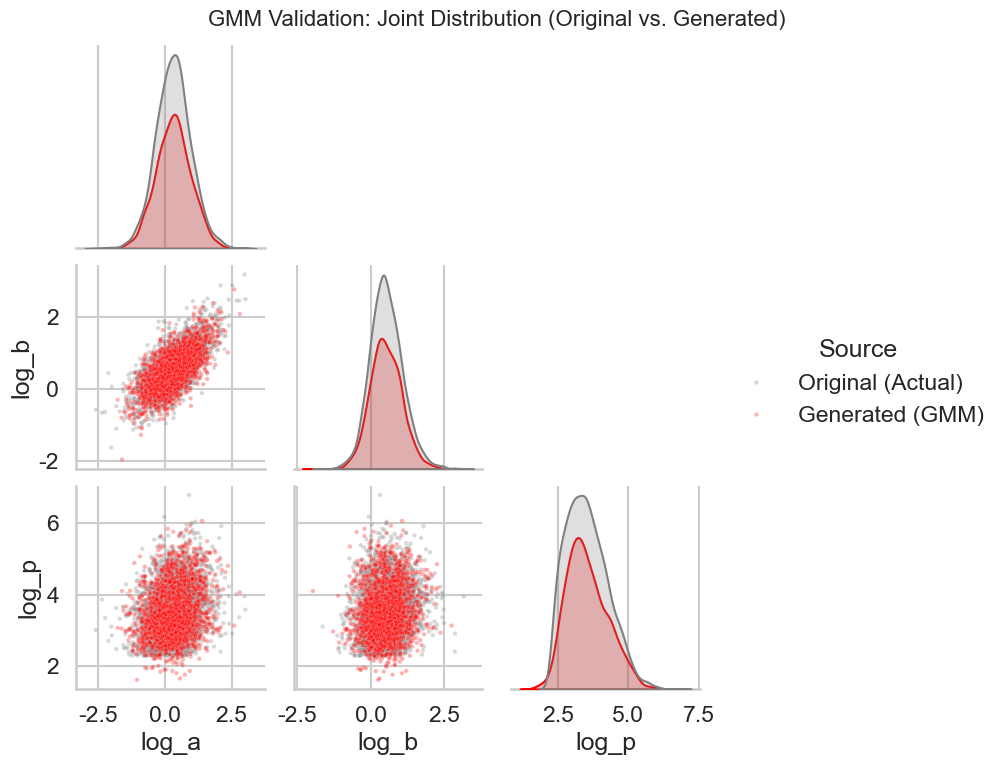

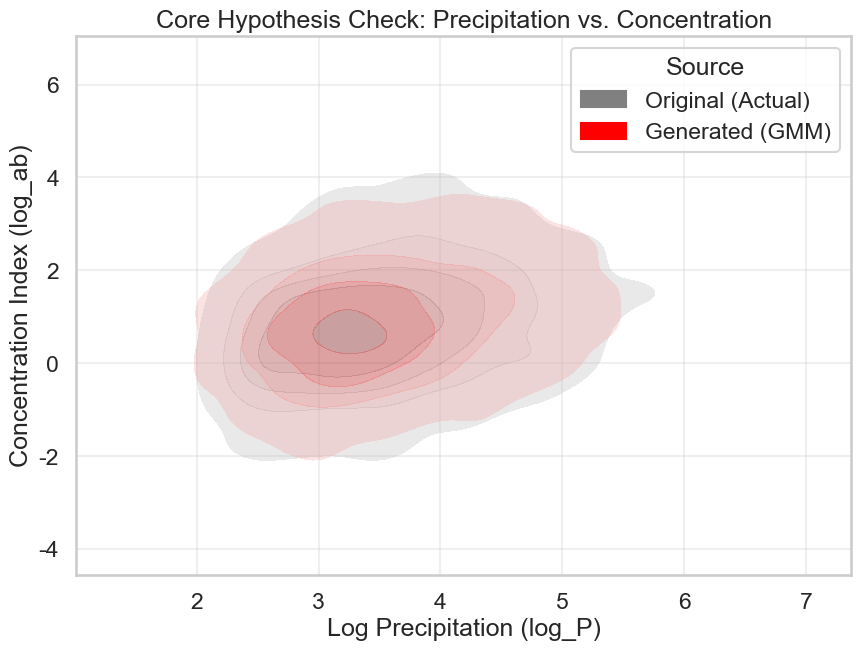

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gmm_joint_validation(ai_model, original_df, n_samples=2000):
    """
    Validates the GMM by overlaying the learned distribution (Generated) 
    on top of the actual data (Original) using a Pairplot.
    """
    print(">>> GMM Joint Distribution Validation Plotting...")
    
    # 1. Prepare Original Data (Log Transform)
    # We convert to log scale to match the GMM's training space
    df_org = pd.DataFrame()
    df_org['log_a'] = np.log(original_df['a'])
    df_org['log_b'] = np.log(original_df['b'])
    df_org['log_p'] = np.log(original_df['total_precip'])
    df_org['Source'] = 'Original (Actual)'
    
    # 2. Generate Synthetic Data from GMM (Sampling)
    if ai_model.model is None:
        print("Error: Model is not trained.")
        return

    generated_samples, _ = ai_model.model.sample(n_samples)
    df_gen = pd.DataFrame(generated_samples, columns=['log_a', 'log_b', 'log_p'])
    df_gen['Source'] = 'Generated (GMM)'
    
    # 3. Combine Dataframes
    df_combined = pd.concat([df_org, df_gen], ignore_index=True)
    
    # 4. Visualization 1: Pairplot (All Correlations)
    # Checks if the red dots (Generated) cover the gray dots (Original) well
    g = sns.pairplot(
        df_combined, 
        hue='Source',            # Color by source
        kind='scatter',          # Scatter plots for off-diagonals
        diag_kind='kde',         # KDE (Density) for diagonals
        palette={'Original (Actual)': 'gray', 'Generated (GMM)': 'red'},
        plot_kws={'alpha': 0.3, 's': 10}, # Transparency and dot size
        diag_kws={'fill': True},
        corner=True              # Remove redundant upper triangle
    )
    
    g.fig.suptitle("GMM Validation: Joint Distribution (Original vs. Generated)", y=1.02, fontsize=16)
    plt.show()

    # 5. Visualization 2: Core Hypothesis Check (Precipitation vs. Concentration)
    # Verifies if the model learned "Higher Precip = Higher Peakedness"
    plt.figure(figsize=(10, 7))
    
    # Create Concentration Index
    df_combined['Concentration Index (log_ab)'] = df_combined['log_a'] + df_combined['log_b']
    
    sns.kdeplot(
        data=df_combined, x='log_p', y='Concentration Index (log_ab)', 
        hue='Source', fill=True, alpha=0.3, 
        palette={'Original (Actual)': 'gray', 'Generated (GMM)': 'red'},
        levels=5
    )
    plt.title("Core Hypothesis Check: Precipitation vs. Concentration")
    plt.xlabel("Log Precipitation (log_P)")
    plt.ylabel("Concentration Index (log_ab)")
    plt.grid(True, alpha=0.3)
    plt.show()

# --- Usage ---
# Assumes 'ai_model' is trained and 'master_df' exists from previous steps
plot_gmm_joint_validation(ai_model, master_df)

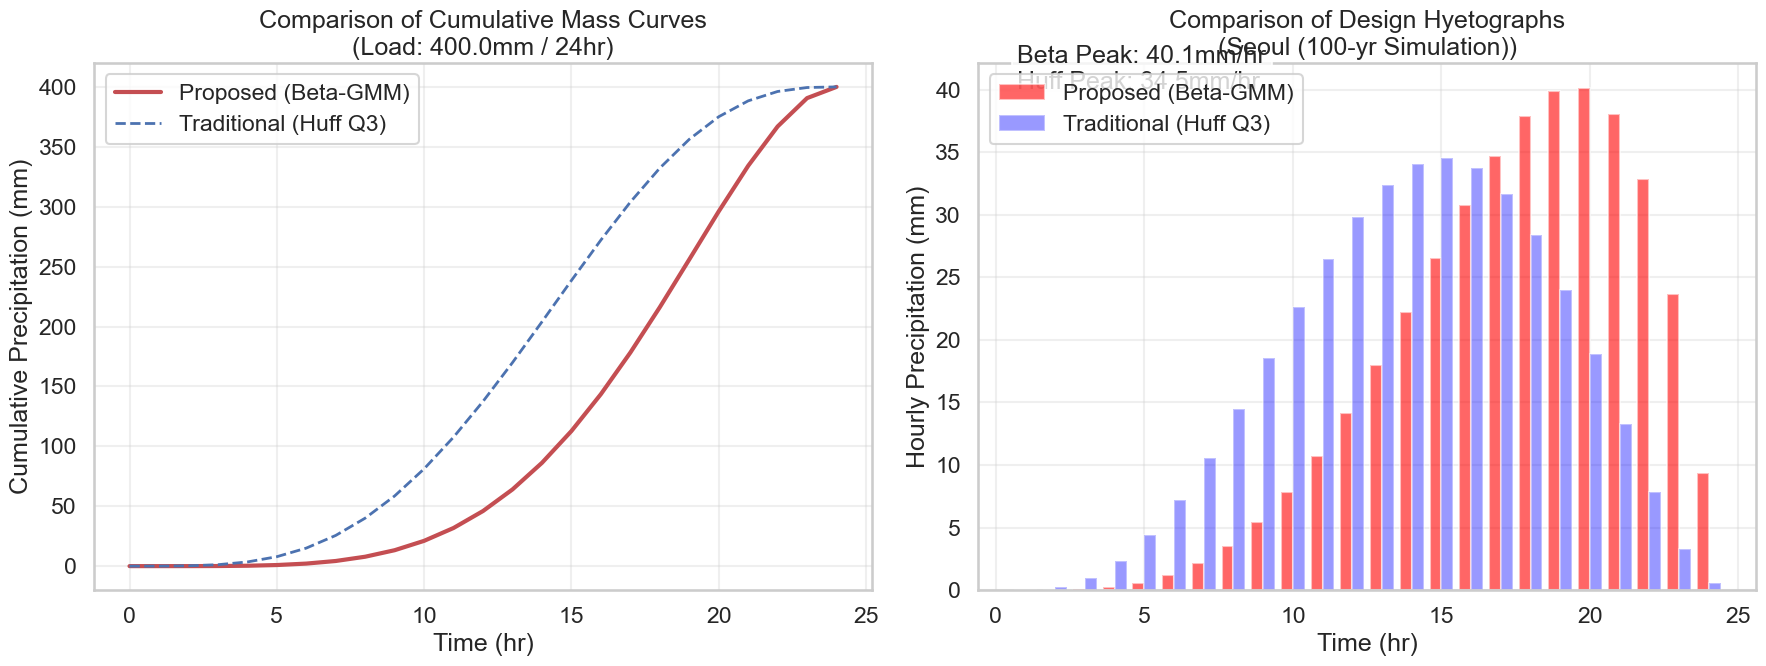

In [30]:

plot_huff_vs_beta(a, b, TARGET_PRECIP_100YR, TARGET_DURATION, STATION_NAME)


=== 재현기간별 패턴 매개변수 변화 분석 ===
[10년 빈도 | 150mm] a=3.04, b=4.14 -> 집중도: 2.53
[30년 빈도 | 220mm] a=4.85, b=2.69 -> 집중도: 2.57
[50년 빈도 | 280mm] a=5.34, b=2.77 -> 집중도: 2.69
[80년 빈도 | 340mm] a=4.87, b=3.39 -> 집중도: 2.81
[100년 빈도 | 400mm] a=4.10, b=3.19 -> 집중도: 2.57
[200년 빈도 | 480mm] a=3.95, b=3.03 -> 집중도: 2.48


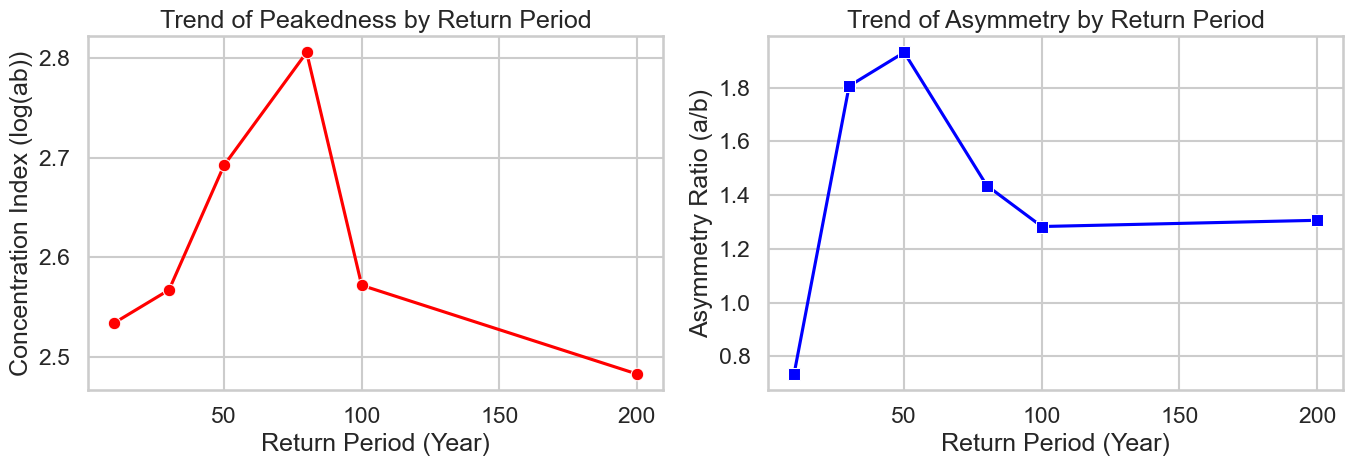

In [31]:
def analyze_return_period_trend(ai_model, precip_dict):
    """
    재현기간별(강수량별) 최적 Beta 파라미터의 변화 추세를 분석
    :param ai_model: 학습된 DesignRainfallModel 인스턴스
    :param precip_dict: {재현기간(년): 강수량(mm)} 딕셔너리
    """
    results = []
    
    print("\n=== 재현기간별 패턴 매개변수 변화 분석 ===")
    for year, p_target in precip_dict.items():
        # 해당 강수량에 대한 최적 패턴 도출
        a, b, _ = ai_model.derive_design_pattern(p_target, n_simulations=200000, tolerance=0.1)
        
        if a is not None:
            log_ab = np.log(a * b) # 집중도 지수
            ratio_ab = a / b       # 비대칭도 지수
            results.append({
                'Return Period': year,
                'Precipitation': p_target,
                'a': a, 'b': b,
                'Concentration (log_ab)': log_ab,
                'Asymmetry (a/b)': ratio_ab
            })
            print(f"[{year}년 빈도 | {p_target}mm] a={a:.2f}, b={b:.2f} -> 집중도: {log_ab:.2f}")

    df_trend = pd.DataFrame(results)
    
    # --- 시각화 ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # 1. 재현기간 vs 집중도 (log_ab)
    sns.lineplot(data=df_trend, x='Return Period', y='Concentration (log_ab)', marker='o', ax=ax1, color='red')
    ax1.set_title("Trend of Peakedness by Return Period")
    ax1.set_ylabel("Concentration Index (log(ab))")
    ax1.set_xlabel("Return Period (Year)")
    ax1.grid(True)
    
    # 2. 재현기간 vs 비대칭도 (a/b)
    sns.lineplot(data=df_trend, x='Return Period', y='Asymmetry (a/b)', marker='s', ax=ax2, color='blue')
    ax2.set_title("Trend of Asymmetry by Return Period")
    ax2.set_ylabel("Asymmetry Ratio (a/b)")
    ax2.set_xlabel("Return Period (Year)")
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df_trend

# --- 실행 예시 ---
# 1. 확률강수량 정보 (빈도해석 결과라고 가정)
return_periods = {
    10: 150,  # 10년 빈도 150mm
    30: 220,  # 30년 빈도 220mm
    50: 280,  # 50년 빈도 280mm
    80: 340,  # 80년 빈도 340mm
    100: 400, # 100년 빈도 400mm
    200: 480  # 200년 빈도 480mm (극한)
}

# 2. 분석 실행 (ai_model은 이미 학습되어 있어야 함)
df_trend = analyze_return_period_trend(ai_model, return_periods)

In [32]:
# a=2.68, b=1.63, P=480mm (24시간)
t = np.linspace(0, 1, 25) # 24시간
cdf = stats.beta.cdf(t, 2.68, 1.63) * 480
hourly = np.diff(cdf)
print(f"시간당 최대 강우량: {np.max(hourly):.1f} mm/hr")

시간당 최대 강우량: 34.0 mm/hr
